# Метод треугольников с адаптивным подбором L

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import sys

import scipy.stats as sts

from numpy.linalg import norm

#sys.path.insert(0, "../Zeudel, Gauss methods/")
from uigm import AdaptiveFDA, FastDualAveraging, Gradient

plt.rcParams['figure.figsize'] = (16, 10)

In [2]:
plt.rcParams['figure.figsize'] = (16, 10)

In [3]:
A = np.array([[1, 2], [2, 3]])
b = np.array([1, 2])
x_expl = np.array([1, 0])
x0_rn = np.array([0.1, 0.2])
x0_smp = np.array([0.1, 0.2])
eps = 0.05

# ||Ax - b||^2
def func1(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)**2


def gradFunc1(x, func1, eps = 0) :
    return 2*A.transpose() @ (A @ x - b)

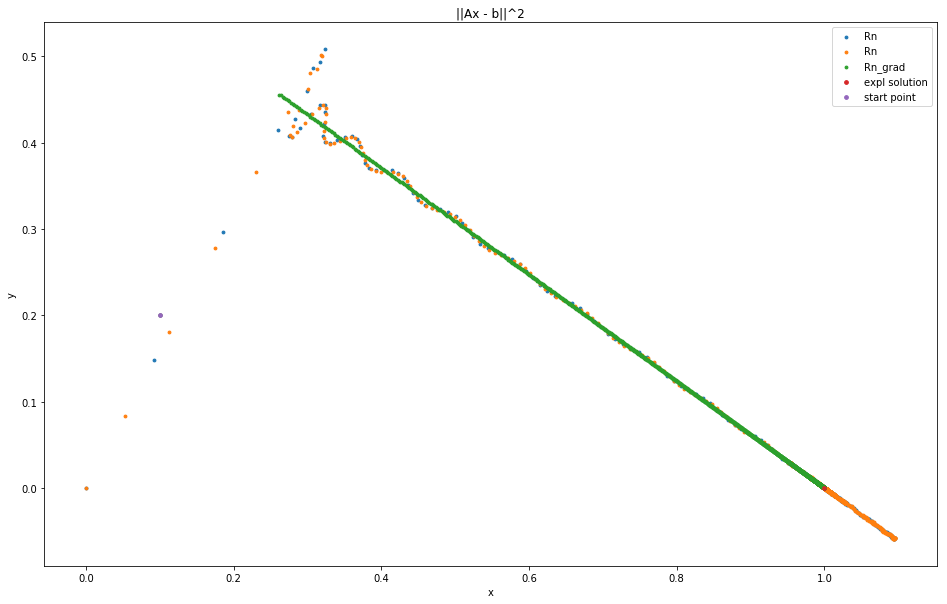

In [8]:
L = 36

xk_rn   = FastDualAveraging(func1, x0_rn,  eps, set_type = "rn", grad = gradFunc1, step = lambda k: (k+1)/(2*L), alpha = lambda k: 2/(k+1))
xk_rn_adapt   = AdaptiveFDA(func1, x0_rn,  eps, set_type = "rn", grad = gradFunc1)
xk_grad = Gradient(func1, x0_rn, eps, L, set_type = "rn", grad = gradFunc1)

plt.scatter([xk_rn[i][0] for i in range(0, len(xk_rn))], [xk_rn[i][1] for i in range(0, len(xk_rn))], label = "Rn", s=8)
plt.scatter([xk_rn_adapt[i][0] for i in range(0, len(xk_rn_adapt))], [xk_rn_adapt[i][1] for i in range(0, len(xk_rn_adapt))], label = "Rn", s=8)
plt.scatter([xk_grad[i][0] for i in range(0, len(xk_grad))], [xk_grad[i][1] for i in range(0, len(xk_grad))], label = "Rn_grad", s=8)

plt.scatter(x_expl[0], x_expl[1], label = "expl solution", s = 14)
plt.scatter(x0_rn[0],  x0_rn[1],  label = "start point",   s = 14)

plt.xlabel("x")
plt.ylabel("y")
plt.title("||Ax - b||^2")
plt.legend()

In [9]:
def ln_diff(x):
    return np.log((func1(x) - func1(x_expl))/(func1(x0_rn) - func1(x_expl)))

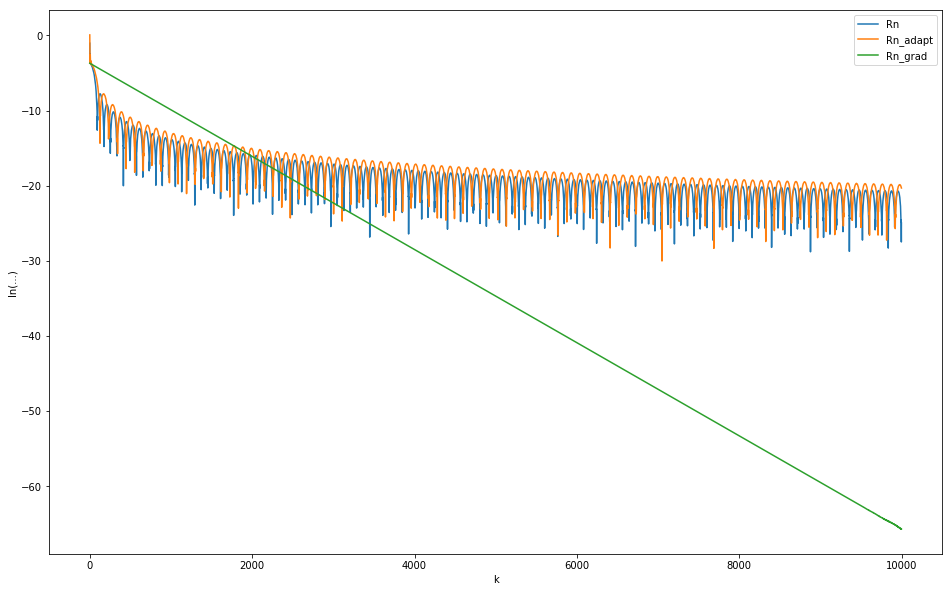

In [11]:
plt.plot([ln_diff(xk_rn[i]) for i in range(3, len(xk_rn))], label = "Rn")
plt.plot([ln_diff(xk_rn_adapt[i]) for i in range(3, len(xk_rn_adapt))], label = "Rn_adapt")
plt.plot([ln_diff(xk_grad[i]) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [12]:
print("Метод треугольников: ", "f(x) = ", func1(xk_rn[-1]))
print("Адаптивный метод: ", "f(x) = ", func1(xk_rn_adapt[-1]))
print("Градиентный метод: ", "f(x) = ", func1(xk_grad[-1]))

Метод треугольников:  f(x) =  2.41488269394455e-11
Адаптивный метод:  f(x) =  2.5375911314239414e-09
Градиентный метод:  f(x) =  4.8564249477668534e-29


In [25]:
N = 200 # размерность пространства

# генерируем случайные A и b
uniform_rv = sts.uniform(-100, 200) # Равномерное распределение от -100 до 100
A = uniform_rv.rvs(size = (N, N))
b = uniform_rv.rvs(size = N)
x0_rn = np.zeros(N)

x_expl = np.linalg.inv(A) @ b

L = max(abs(np.linalg.eig(2 * A.transpose() @ A)[0]))


In [26]:
xk_rn   = FastDualAveraging(func1, x0_rn,  eps, num_of_steps = 10000, set_type = "rn", grad = gradFunc1, step = lambda k: (k+1)/(2*L), alpha = lambda k: 2/(k+1))
xk_rn_adapt   = AdaptiveFDA(func1, x0_rn,  eps, num_of_steps = 10000, set_type = "rn", grad = gradFunc1)
xk_grad = Gradient(func1, x0_rn, eps, L, num_of_steps = 10000, set_type = "rn", grad = gradFunc1)

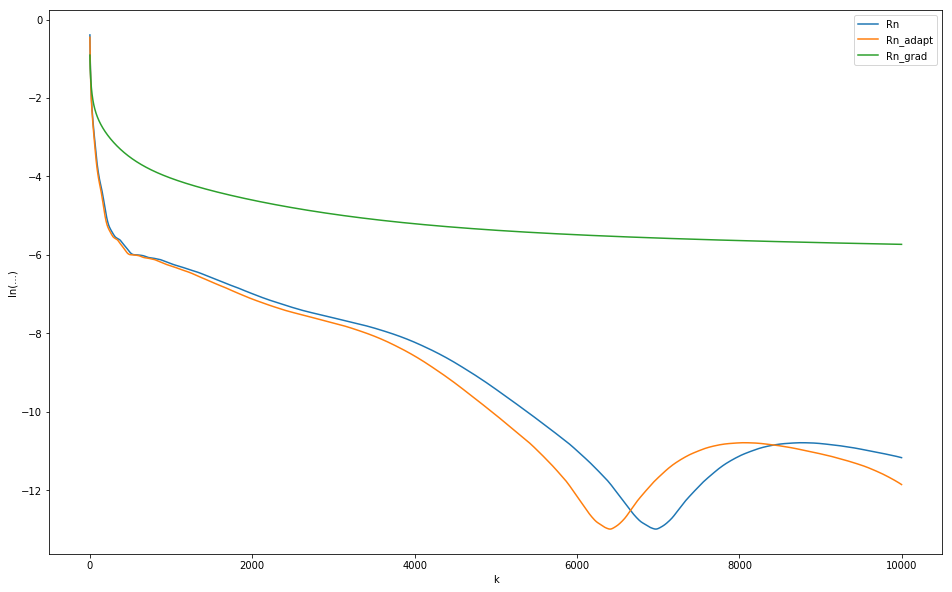

In [27]:
plt.plot([ln_diff(xk_rn[i]) for i in range(3, len(xk_rn))], label = "Rn")
plt.plot([ln_diff(xk_rn_adapt[i]) for i in range(3, len(xk_grad))], label = "Rn_adapt")
plt.plot([ln_diff(xk_grad[i]) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [28]:
print("Метод треугольников: ", "f(x) = ", func1(xk_rn[-1]))
print("Адаптивный метод: ", "f(x) = ", func1(xk_rn_adapt[-1]))
print("Градиентный метод: ", "f(x) = ", func1(xk_grad[-1]))

Метод треугольников:  f(x) =  9.038265087650709
Адаптивный метод:  f(x) =  4.5536926995565485
Градиентный метод:  f(x) =  2075.991306737801


## Тест на случае прямоугольной матрицы A

In [40]:
N = 100
M = 90

# генерируем случайные A и b
uniform_rv = sts.uniform(-100, 200) # Равномерное распределение от -100 до 100
A = uniform_rv.rvs(size = (M, N))
b = uniform_rv.rvs(size = M)
x0_rn = np.zeros(N)

L = max(abs(np.linalg.eig(2 * A.transpose() @ A)[0]))

/home/vasiliydz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/vasiliydz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


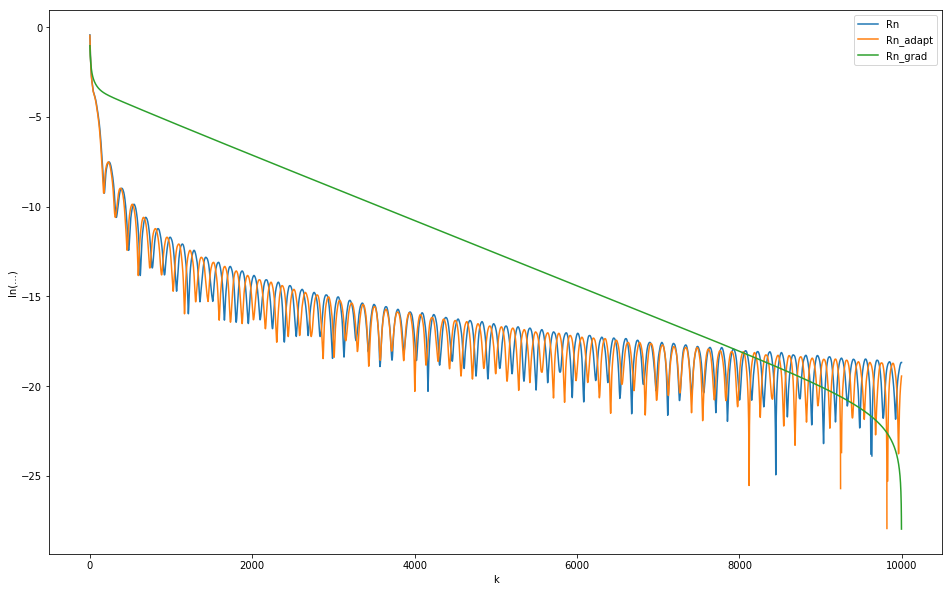

In [41]:
xk_rn   = FastDualAveraging(func1, x0_rn,  eps, num_of_steps = 10000, set_type = "rn", grad = gradFunc1, step = lambda k: (k+1)/(2*L), alpha = lambda k: 2/(k+1))
xk_rn_adapt   = AdaptiveFDA(func1, x0_rn,  eps, num_of_steps = 10000, set_type = "rn", grad = gradFunc1)
xk_grad = Gradient(func1, x0_rn, eps, L, num_of_steps = 10000, set_type = "rn", grad = gradFunc1)

x_expl = xk_grad[-1]

plt.plot([ln_diff(xk_rn[i]) for i in range(3, len(xk_rn))], label = "Rn")
plt.plot([ln_diff(xk_rn_adapt[i]) for i in range(3, len(xk_grad))], label = "Rn_adapt")
plt.plot([ln_diff(xk_grad[i]) for i in range(3, len(xk_grad))], label = "Rn_grad")
plt.xlabel("k")
plt.ylabel("ln(...)")
plt.legend()

In [42]:
print("Метод треугольников: ", "f(x) = ", func1(xk_rn[-1]))
print("Адаптивный метод: ", "f(x) = ", func1(xk_rn_adapt[-1]))
print("Градиентный метод: ", "f(x) = ", func1(xk_grad[-1]))

Метод треугольников:  f(x) =  0.0025105356226744952
Адаптивный метод:  f(x) =  0.0012409103923643916
Градиентный метод:  f(x) =  0.00012243605672565178


Вывод: чем ближе матрица $A$ к квадратной, тем лучше работает метод треугольников как с задаваемым $L$, так и с адаптивным. 